# Task 2: Visualizing fire scars through false color

Author: Rachel Swick


## 1. Import Libraries

In [1]:
# Load libraries
import os 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rioxr

## 2. Load Data

In [2]:
# Load Thomas Fire boundary data
thomas_fire = gpd.read_file(os.path.join('data', 'thomas_fire.shp'))

# Load landsat data
landsat = rioxr.open_rasterio(os.path.join('data', 'landsat8-2018-01-26-sb-simplified.nc'))

## 3. Data Exploration

In [3]:
# Display landsat contents
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [4]:
# 
print('Variables: ', landsat.data_vars)

Variables:  Data variables:
    red      (band, y, x) float64 ...
    green    (band, y, x) float64 ...
    blue     (band, y, x) float64 ...
    nir08    (band, y, x) float64 ...
    swir22   (band, y, x) float64 ...


In [5]:
#
landsat.coords

Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0

In [6]:
# 
print("Sizes of dimensions:", dict(landsat.sizes))

Sizes of dimensions: {'y': 731, 'x': 870, 'band': 1}


## 4. Data Exploration Summary

## 5. Cleaning

In [7]:
# Original dimensions and coordinates
print(landsat.dims, landsat.coords)

Frozen({'y': 731, 'x': 870, 'band': 1}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0


In [8]:
# Remove band dimension
# Remove coordinates associated to band
landsat = landsat.squeeze()
landsat = landsat.drop_vars('band')
print(landsat.dims, landsat.coords)

Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0


## 6. True Color Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


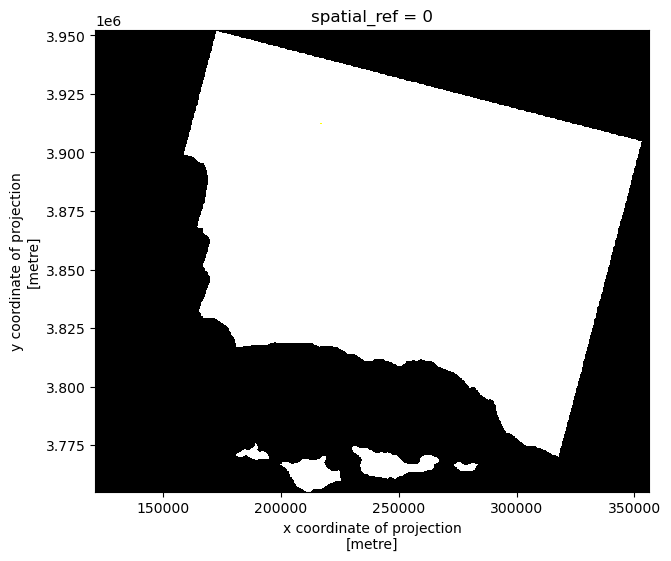

In [17]:
rgb = landsat[['red', 'green', 'blue']].to_array()
rgb_aspect_ratio = rgb.rio.width / rgb.rio.height # Raster's aspect ratio
rgb.plot.imshow(size=6, # Plot's height in inches
                aspect=rgb_aspect_ratio # Ratio of width/height
               )

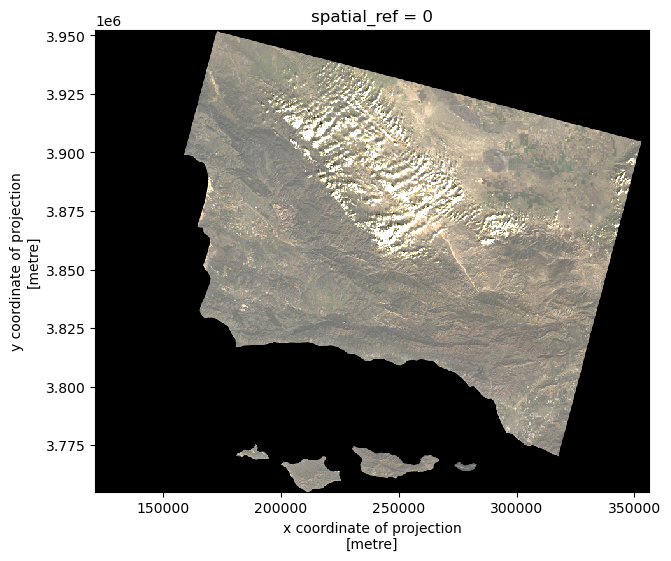

In [18]:
rgb.plot.imshow(size=6, # Plot's height in inches
                aspect=rgb_aspect_ratio, # Ratio of width/height
                robust=True)

## 7. False Color Image

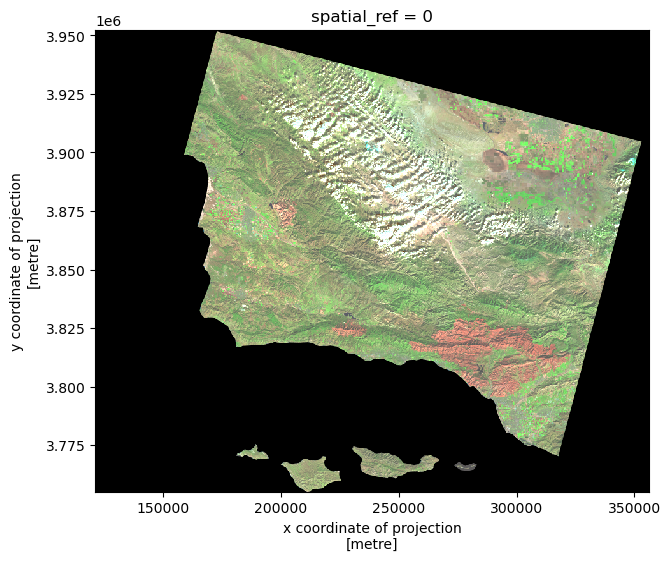

In [20]:
false_color = landsat[['swir22', 'nir08', 'red']].to_array()
false_color_aspect_ratio = false_color.rio.width / false_color.rio.height 
false_color.plot.imshow(size=6, 
                        aspect=false_color_aspect_ratio,
                        robust=True
                       )

## 8. False Color Image Map of Thomas Fire

In [36]:
# Plot
fig, ax = plt.subplots()  
false_color.plot.imshow(ax=ax,
                        robust=True,
                        legend.show=True
)

#false_color.plot.imshow(size=6, 
 #                       aspect=false_color_aspect_ratio,
  #                      robust=True
   #                    )
# Add title
ax.set_title("False Color Map of 2017 Thomas Fire")  

# Remove axes ticks
ax.set_xticks([])  
ax.set_yticks([])  

# Remove axes labels
ax.set_xlabel("")  
ax.set_ylabel("")  

plt.show()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3578548270.py, line 5)